<a href="https://colab.research.google.com/github/marcyomacedo/MK/blob/master/Marcio_Macedo_da_Silva_Filho_03_notebook_exercicio_pratico_comparativo_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Exercício Prático - Comparativo com Vinhos

Classificação de Qualidade de Vinhos do tipo 'Tinto' (Arquivo fornecido junto com notebook - 'winequality-red.csv')

Utilizar as técnicas de Cross-Validation e StratifiedKFold no problema de classificação dos Vinhos

# 1 - Extração dos Atributos



In [ ]:
# Seus códigos para a etapa 1 deverão ser criados aqui:
import pandas as pd

import matplotlib.pyplot as plt

arquivo = 'https://raw.githubusercontent.com/rafaelmm82/ufpb-ia-20201/master/02-fundamentos_de_ia/02_exercicio_pratico/winequality-red.csv'

dataset = pd.read_csv(arquivo, header=0, sep=";")

print(dataset)
print(dataset.shape)
print(dataset.groupby('quality').size())

      fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.310         0.47  ...       0.6

# 2 - Divisão dos Dados com Cross-Validation


In [ ]:
# Seus códigos para a etapa 2 deverão ser criados aqui:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

array = dataset.values
X = array[:,0:11]
y = array[:,11]

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

model = LogisticRegression(solver='liblinear', multi_class='ovr')

cv_results = cross_val_score(model, X_train, Y_train, cv=3, scoring='accuracy')
print('cv_results ', cv_results)

print(f'LR, média {cv_results.mean()} e desvio padrão {cv_results.std()}')



cv_results  [0.55503513 0.60328638 0.55868545]
LR, média 0.5723356532638454 e desvio padrão 0.02193615051438726


# 3 - Comparativo entre Modelos Com Cross-Validation e StratifiedKFold


In [ ]:
# Seus códigos para a etapa 3 deverão ser criados aqui: 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold 
from sklearn.linear_model import LogisticRegression

array = dataset.values
X = array[:,0:11]
y = array[:,11]

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)


kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)  

model = LogisticRegression(solver='liblinear', multi_class='ovr')
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')  # <-- aqui a diferença
print('cv_results ', cv_results)

print(f'{len(cv_results)} treinamentos realizados')


for valor in cv_results:
  print(f'resultado treino: {valor:.02}')

print(f'LR, média {cv_results.mean():.02} e desvio padrão {cv_results.std():0.2}')

cv_results  [0.54296875 0.5703125  0.609375   0.5390625  0.58823529]
5 treinamentos realizados
resultado treino: 0.54
resultado treino: 0.57
resultado treino: 0.61
resultado treino: 0.54
resultado treino: 0.59
LR, média 0.57 e desvio padrão 0.027


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC(gamma='auto')))
models.append(('CART', DecisionTreeClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))

results = []
names = []

for name, model in models:
	kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('modelo %s: média %f desvio(%f)' % (name, cv_results.mean(), cv_results.std()))

modelo LR: média 0.569991 desvio(0.026724)
modelo KNN: média 0.498863 desvio(0.038901)
modelo SVC: média 0.561403 desvio(0.020633)
modelo CART: média 0.600481 desvio(0.013942)
modelo LDA: média 0.590340 desvio(0.041203)
modelo NB: média 0.527773 desvio(0.030445)


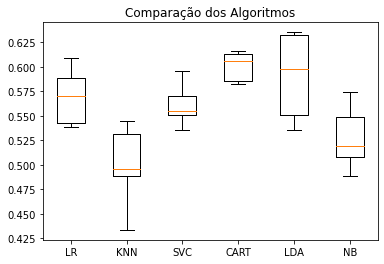

In [ ]:
plt.boxplot(results, labels=names)
plt.title('Comparação dos Algoritmos')
plt.show()

In [ ]:
for result in results:
  print(result)

[0.54296875 0.5703125  0.609375   0.5390625  0.58823529]
[0.49609375 0.48828125 0.53125    0.43359375 0.54509804]
[0.5546875  0.5703125  0.55078125 0.53515625 0.59607843]
[0.60546875 0.5859375  0.61328125 0.58203125 0.61568627]
[0.53515625 0.59765625 0.6328125  0.55078125 0.63529412]
[0.5078125  0.51953125 0.57421875 0.48828125 0.54901961]
